In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.regression.linear_model as sm

In [2]:
scores = pd.read_csv('Polarity Scores.csv')
scores

,Pos_Score,Neu_Score,Neg_Score,Comp_Score
0,0.283,0.599,0.118,0.9792
1,0.149,0.788,0.063,0.8934
2,0.122,0.797,0.081,1.0000
3,0.134,0.755,0.112,0.9999
4,0.092,0.786,0.121,-0.5120
...,...,...,...,...
595,0.153,0.813,0.034,0.9972
596,0.133,0.676,0.191,-0.9850
597,0.197,0.788,0.015,0.9967
598,0.128,0.824,0.048,0.9863


In [3]:
songs = pd.read_csv('Songs_Sampled.csv')
songs

,Unnamed: 0,index,Rank,Song,Performer,SongID,spotify_genre,spotify_track_popularity,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,Datetime,Year
0,0,242,1,Smoke Gets In Your Eyes,The Platters,Smoke Gets In Your EyesThe Platters,"['adult standards', 'brill building pop', 'doo...",63.0,0.203,0.2950,...,1.0,0.0323,0.920000,0.000002,0.1730,0.285,171.222,3.0,1959-01-31,1959
1,1,1967,2,Telstar,The Tornadoes,TelstarThe Tornadoes,['surf music'],8.0,0.289,0.7280,...,0.0,0.0385,0.000368,0.929000,0.3810,0.539,143.988,4.0,1963-01-19,1963
2,2,1659,2,Stranger On The Shore,Mr. Acker Bilk,Stranger On The ShoreMr. Acker Bilk,[],7.0,0.405,0.0201,...,1.0,0.0376,0.988000,0.888000,0.1110,0.271,77.951,4.0,1962-06-02,1962
3,3,1055,2,Calcutta,Lawrence Welk And His Orchestra,CalcuttaLawrence Welk And His Orchestra,[],32.0,0.460,0.6750,...,1.0,0.0279,0.825000,0.910000,0.2300,0.954,81.817,4.0,1961-02-25,1961
4,4,1174,2,Runaway,Del Shannon,RunawayDel Shannon,"['adult standards', 'brill building pop', 'bub...",61.0,0.594,0.5330,...,0.0,0.0438,0.153000,0.000015,0.1720,0.729,78.552,4.0,1961-05-20,1961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,595,22572,7,Better Now,Post Malone,Better NowPost Malone,"['dfw rap', 'melodic rap', 'rap']",88.0,0.680,0.5630,...,1.0,0.0454,0.354000,0.000000,0.1360,0.374,145.028,4.0,2018-05-12,2018
596,596,22462,7,Pray For Me,The Weeknd & Kendrick Lamar,Pray For MeThe Weeknd & Kendrick Lamar,"['canadian contemporary r&b', 'canadian pop', ...",78.0,0.735,0.6770,...,1.0,0.0930,0.076200,0.000022,0.1110,0.188,100.584,4.0,2018-02-17,2018
597,597,20535,7,Beauty And A Beat,Justin Bieber Featuring Nicki Minaj,Beauty And A BeatJustin Bieber Featuring Nicki...,"['canadian pop', 'dance pop', 'pop', 'post-tee...",72.0,0.601,0.8430,...,1.0,0.0593,0.000704,0.000053,0.0681,0.534,128.002,4.0,2013-01-19,2013
598,598,21763,7,Don't Let Me Down,The Chainsmokers Featuring Daya,Don't Let Me DownThe Chainsmokers Featuring Daya,"['electropop', 'pop', 'tropical house']",81.0,0.532,0.8690,...,1.0,0.1720,0.157000,0.005080,0.1360,0.422,159.803,4.0,2016-05-28,2016


In [4]:
years = songs['Year']
comp_score = scores['Comp_Score']
valence = songs['speechiness']
acousticness = songs['acousticness']

ya = []
yv = []
av = []
yav = []

for i in range(600):
    yv.append(years[i] * valence[i])
    ya.append(years[i] * acousticness[i])
    av.append(acousticness[i] * valence[i])
    yav.append(years[i] * acousticness[i] * valence[i])

In [5]:
dict = { 'Year': years,
        'Valence': valence,
        'Acousticness': acousticness,
        'yv': yv,
        'ya': ya,
        'av': av,
        'yav': yav,
        'Comp_Score': comp_score
}

df = pd.DataFrame(dict)

In [6]:
df = df.dropna()
df

,Year,Valence,Acousticness,yv,ya,av,yav,Comp_Score
0,1959,0.0323,0.920000,63.2757,1802.280000,0.029716,58.213644,0.9792
1,1963,0.0385,0.000368,75.5755,0.722384,0.000014,0.027812,0.8934
2,1962,0.0376,0.988000,73.7712,1938.456000,0.037149,72.885946,1.0000
3,1961,0.0279,0.825000,54.7119,1617.825000,0.023017,45.137317,0.9999
4,1961,0.0438,0.153000,85.8918,300.033000,0.006701,13.141445,-0.5120
...,...,...,...,...,...,...,...,...
595,2018,0.0454,0.354000,91.6172,714.372000,0.016072,32.432489,0.9972
596,2018,0.0930,0.076200,187.6740,153.771600,0.007087,14.300759,-0.9850
597,2013,0.0593,0.000704,119.3709,1.417152,0.000042,0.084037,0.9967
598,2016,0.1720,0.157000,346.7520,316.512000,0.027004,54.440064,0.9863


In [7]:
X = df[['Year', 'Valence', 'Acousticness', 'yv', 'ya', 'av', 'yav']]
y = df['Comp_Score']

In [8]:
model = sm.OLS(y, X)
results = model.fit()
results.params

Year              0.000278
Valence         110.909859
Acousticness      6.887409
yv               -0.056178
ya               -0.003341
av             -206.199200
yav               0.103597
dtype: float64

In [9]:
decades = []
for row_index, row in df.iterrows():
    year = df.at[row_index, 'Year']
    if year < 1970:
        decades.append('1958-1969')
    elif (year >= 1970 and year < 1980):
        decades.append('1970-1979')
    elif (year >= 1980 and year < 1990):
        decades.append('1980-1989')
    elif (year >= 1990 and year < 2000):
        decades.append('1990-1999')
    elif (year >= 2000 and year < 2010):
        decades.append('2000-2010')
    else:
        decades.append('2010-2019')

In [10]:
residuals = []
for row_index, row in df.iterrows():
    y = df.at[row_index, 'Year']
    v = df.at[row_index, 'Valence']
    a = df.at[row_index, 'Acousticness'] 
    yv = df.at[row_index, 'yv']
    ya = df.at[row_index, 'ya']
    av = df.at[row_index, 'av']
    yav = df.at[row_index, 'yav']
    measured = df.at[row_index, 'Comp_Score']
    predicted = results.predict([y, v, a, yv, ya, av, yav])[0]
    residuals.append(predicted-measured)

In [11]:
df['Decade'] = decades
df['Residual'] = residuals
df.head()

,Year,Valence,Acousticness,yv,ya,av,yav,Comp_Score,Decade,Residual
0,1959,0.0323,0.920000,63.2757,1802.280000,0.029716,58.213644,0.9792,1958-1969,-0.189241
1,1963,0.0385,0.000368,75.5755,0.722384,0.000014,0.027812,0.8934,1958-1969,-0.323003
2,1962,0.0376,0.988000,73.7712,1938.456000,0.037149,72.885946,1.0000,1958-1969,-0.210321
3,1961,0.0279,0.825000,54.7119,1617.825000,0.023017,45.137317,0.9999,1958-1969,-0.227680
4,1961,0.0438,0.153000,85.8918,300.033000,0.006701,13.141445,-0.5120,1958-1969,1.120837


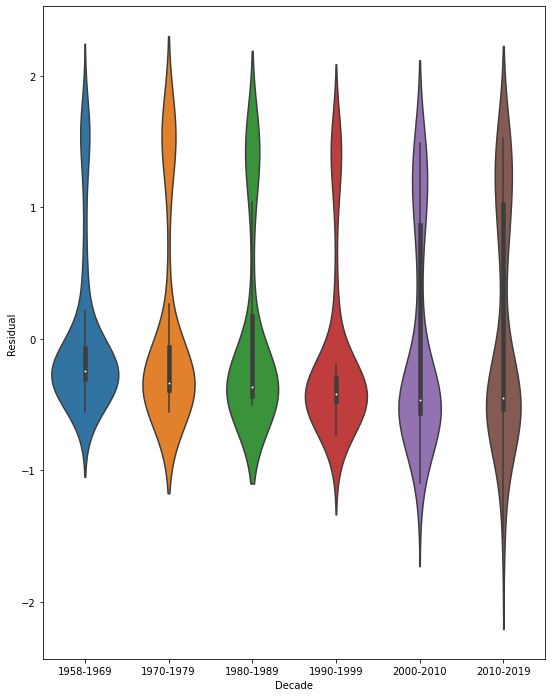

In [12]:
fig, ax = plt.subplots(figsize=(9, 12))
ax = sns.violinplot(x='Decade', y='Residual', data=df)